# 🌍 Exploring Global Renewable Energy Trends and Drivers  
### *Exploratory Data Analysis (EDA)*

## 📘 Introduction  
The goal of this project is to explore **global renewable energy trends**, understand the **drivers behind renewable adoption**, and analyze how factors like **governance quality** and **CO₂ emissions** relate to renewable energy development.

Combined dataset is used created by merging:
- **IRENA** (Renewable Energy Statistics)
- **OWID** (Global CO₂ and greenhouse gas emissions)
- **WGI** (Worldwide Governance Indicators)

This EDA will help us:
- Understand patterns in global renewable energy
- Compare trends across regions and technologies
- Explore relationships with governance and emissions
- Identify potential insights that can guide deeper statistical analysis or dashboards

---

## Research Questions  

### **1 How are renewable energy trends evolving globally and regionally?**  
**Sub-questions:**  
- How has renewable electricity generation changed over time?  
- Which renewable technologies are growing fastest?  
- Which regions lead or lag in renewable adoption?  
- How does renewable capacity per capita differ by region?  

---

### **2 How do governance indicators influence renewable energy adoption?**  
**Sub-questions:**  
- Do countries with stronger governance install more renewables?  
- Which governance dimensions matter most?  
- Do politically unstable countries rely more on international flows?

---

### **3 What is the relationship between renewable energy growth and CO₂ emissions?**  
**Sub-questions:**  
- Does increasing renewable capacity reduce CO₂ per capita?  
- Which regions achieved emissions decline while growing renewables?  
- How do fossil-fuel emissions trends compare with renewable growth?


In [2]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

In [3]:
#Load dataset
csv_path = "../data/final/final_countries.csv"

# Load CSV once with low_memory
df = pd.read_csv(csv_path, low_memory=False)

# Clean column names: lowercase, replace spaces and hyphens with underscores
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
)

# Replace placeholders like '..' with NaN
df.replace('..', np.nan, inplace=True)

# Convert numeric-like columns to numeric
numeric_cols = df.select_dtypes(include=['float', 'int']).columns.tolist()
object_cols = df.select_dtypes(include='object').columns.tolist()

# Convert object columns with numeric strings to float where possible
for col in object_cols:
    df[col] = pd.to_numeric(df[col].str.replace(',', '', regex=False), errors='ignore')

C:\Users\Code Lou\AppData\Local\Temp\ipykernel_1260\2866326851.py:25: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col].str.replace(',', '', regex=False), errors='ignore')


In [4]:

print("Dataset shape:", df.shape)

Dataset shape: (472473, 142)


Basic Overview

In [5]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472473 entries, 0 to 472472
Columns: 142 entries, region to scalesd
dtypes: float64(125), int64(2), object(15)
memory usage: 511.9+ MB


In [ ]:
# Missing values
#eda_df.isna().sum().sort_values(ascending=False).head(20)
# Missing values
missing_summary = pd.DataFrame({
    "Missing Count": df.isna().sum(),
    "Missing %": (df.isna().sum() / len(df) * 100).round(2)
}).sort_values("Missing Count", ascending=False)

print(missing_summary.head(20))

In [ ]:
#owid


In [ ]:
# Descriptive statistics for numeric columns
print("\n--- Numeric Summary Statistics---")
print(df.describe().T.head(20))


--- Numeric Summary ---
                                                  count          mean  \
m49_code                                       472473.0  5.790926e+02   
year                                           472473.0  2.012749e+03   
electricity_generation_(gwh)                   198129.0  1.507522e+04   
electricity_installed_capacity_(mw)            196357.0  3.928475e+03   
heat_generation_(tj)                            63683.0  2.970481e+04   
public_flows_(2022_usd_m)                      472473.0  6.417001e+00   
sdg_7a1_intl._public_flows_(2022_usd_m)        472473.0  2.429316e+00   
sdg_7b1_re_capacity_per_capita_(w/inhabitant)  159762.0  5.544669e+01   
population                                     459324.0  5.341200e+07   
gdp                                            388844.0  9.418177e+11   
cement_co2                                     452718.0  1.078557e+01   
cement_co2_per_capita                          452718.0  1.382941e-01   
co2                       

In [8]:
# Categorical Column Overview
print("\n--- Categorical Columns Unique Values ---")
cat_cols = df.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")



--- Categorical Columns Unique Values ---
region: 7 unique values
sub_region: 21 unique values
country_irena: 235 unique values
iso: 235 unique values
re_or_non_re: 2 unique values
group_technology: 12 unique values
technology: 23 unique values
sub_technology: 47 unique values
producer_type: 5 unique values
country_owid: 209 unique values
country_iso: 197 unique values
codeindyr: 25530 unique values
code: 185 unique values
country: 185 unique values
indicator: 6 unique values


In [6]:
print("indicator:", df['indicator'].nunique()) #number of uniques values
print("indicator:", df['indicator'].unique())
#print(df['Country'].unique()[:20])  # first 20 countries

indicator: 6
indicator: ['cc' 'ge' 'pv' 'rl' 'rq' 'va' nan]


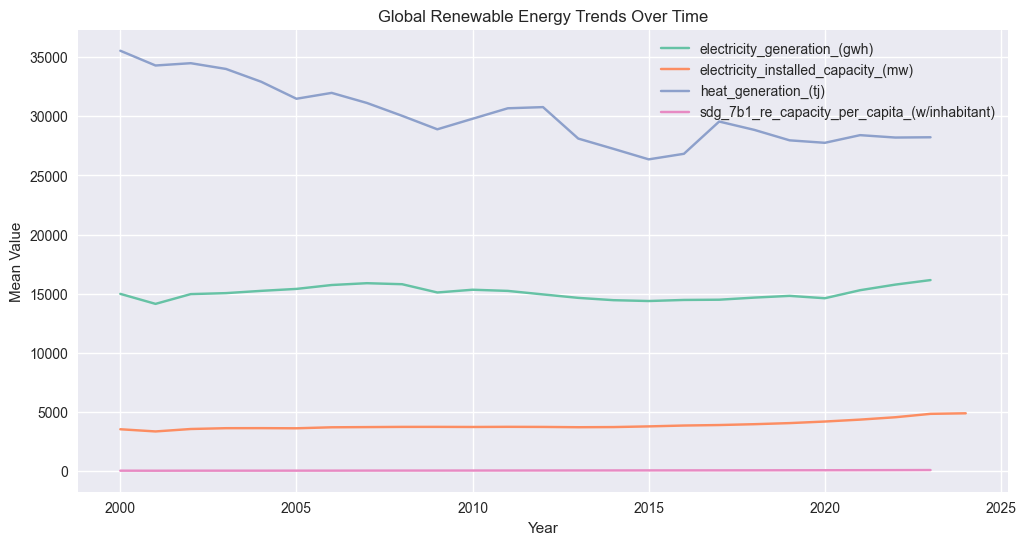

In [9]:
#Global Renewable Energy Trends
renew_cols = [
    "electricity_generation_(gwh)",
    "electricity_installed_capacity_(mw)",
    "heat_generation_(tj)",
    "sdg_7b1_re_capacity_per_capita_(w/inhabitant)"
]

plt.figure(figsize=(12,6))
for col in renew_cols:
    if col in df.columns:
        trend = df.groupby("year")[col].mean()
        trend.plot(label=col)
plt.title("Global Renewable Energy Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Mean Value")
plt.legend()
plt.show()

These are some core metrics to analyze global and regional energy trends over time.
Renewable energy generation and installed capacity show steady growth globally, with some regional differences

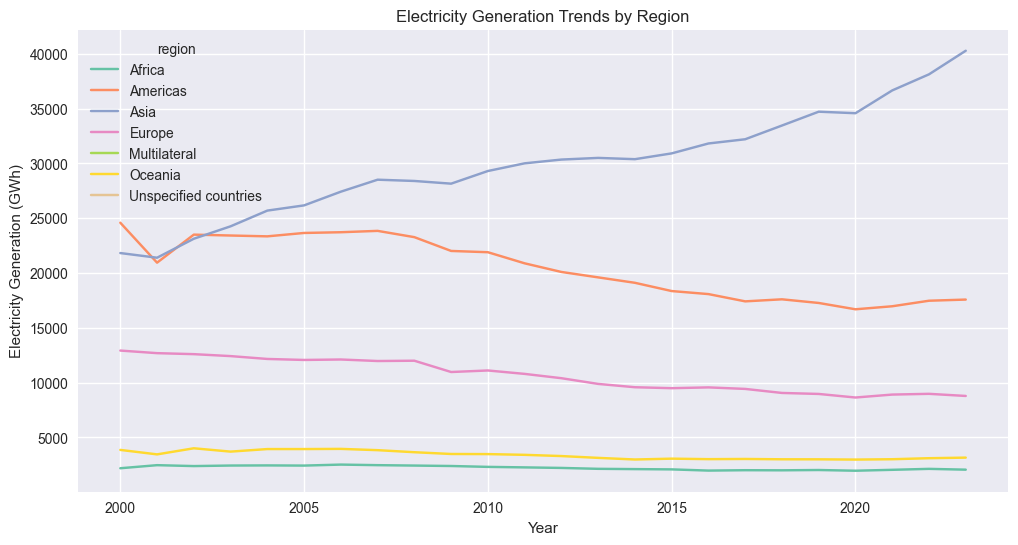

In [11]:
#Renewable Trends by Region
if "region" in df.columns:
    # Group by region and year
    reg = df.groupby(["region", "year"])["electricity_generation_(gwh)"].mean().reset_index()

    plt.figure(figsize=(12,6))
    sns.lineplot(data=reg, x="year", y="electricity_generation_(gwh)", hue="region")
    plt.title("Electricity Generation Trends by Region")
    plt.xlabel("Year")
    plt.ylabel("Electricity Generation (GWh)")
    plt.show()

c:\Users\Code Lou\Documents\projects\global_energy_analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


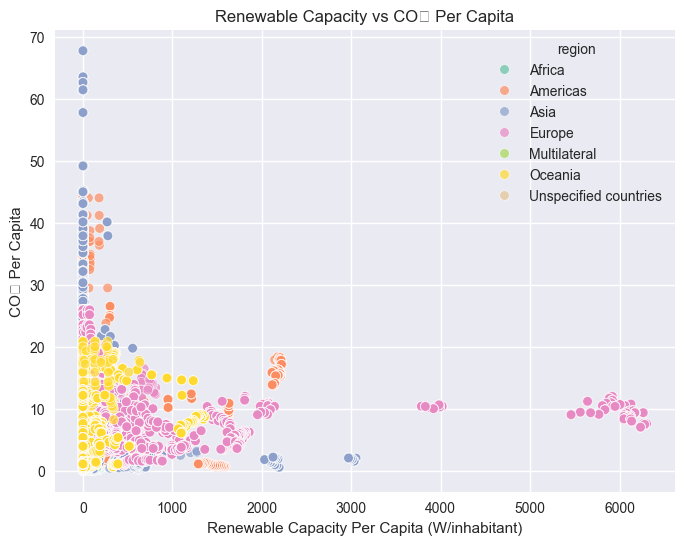

In [43]:
#Renewable Capacity vs CO₂ Emissions
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="sdg_7b1_re_capacity_per_capita_(w/inhabitant)",
    y="co2_per_capita",
    hue="region",
    alpha=0.7
)
plt.title("Renewable Capacity vs CO₂ Per Capita")
plt.xlabel("Renewable Capacity Per Capita (W/inhabitant)")
plt.ylabel("CO₂ Per Capita")
plt.show()


c:\Users\Code Lou\Documents\projects\global_energy_analysis\venv\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Code Lou\Documents\projects\global_energy_analysis\venv\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
c:\Users\Code Lou\Documents\projects\global_energy_analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


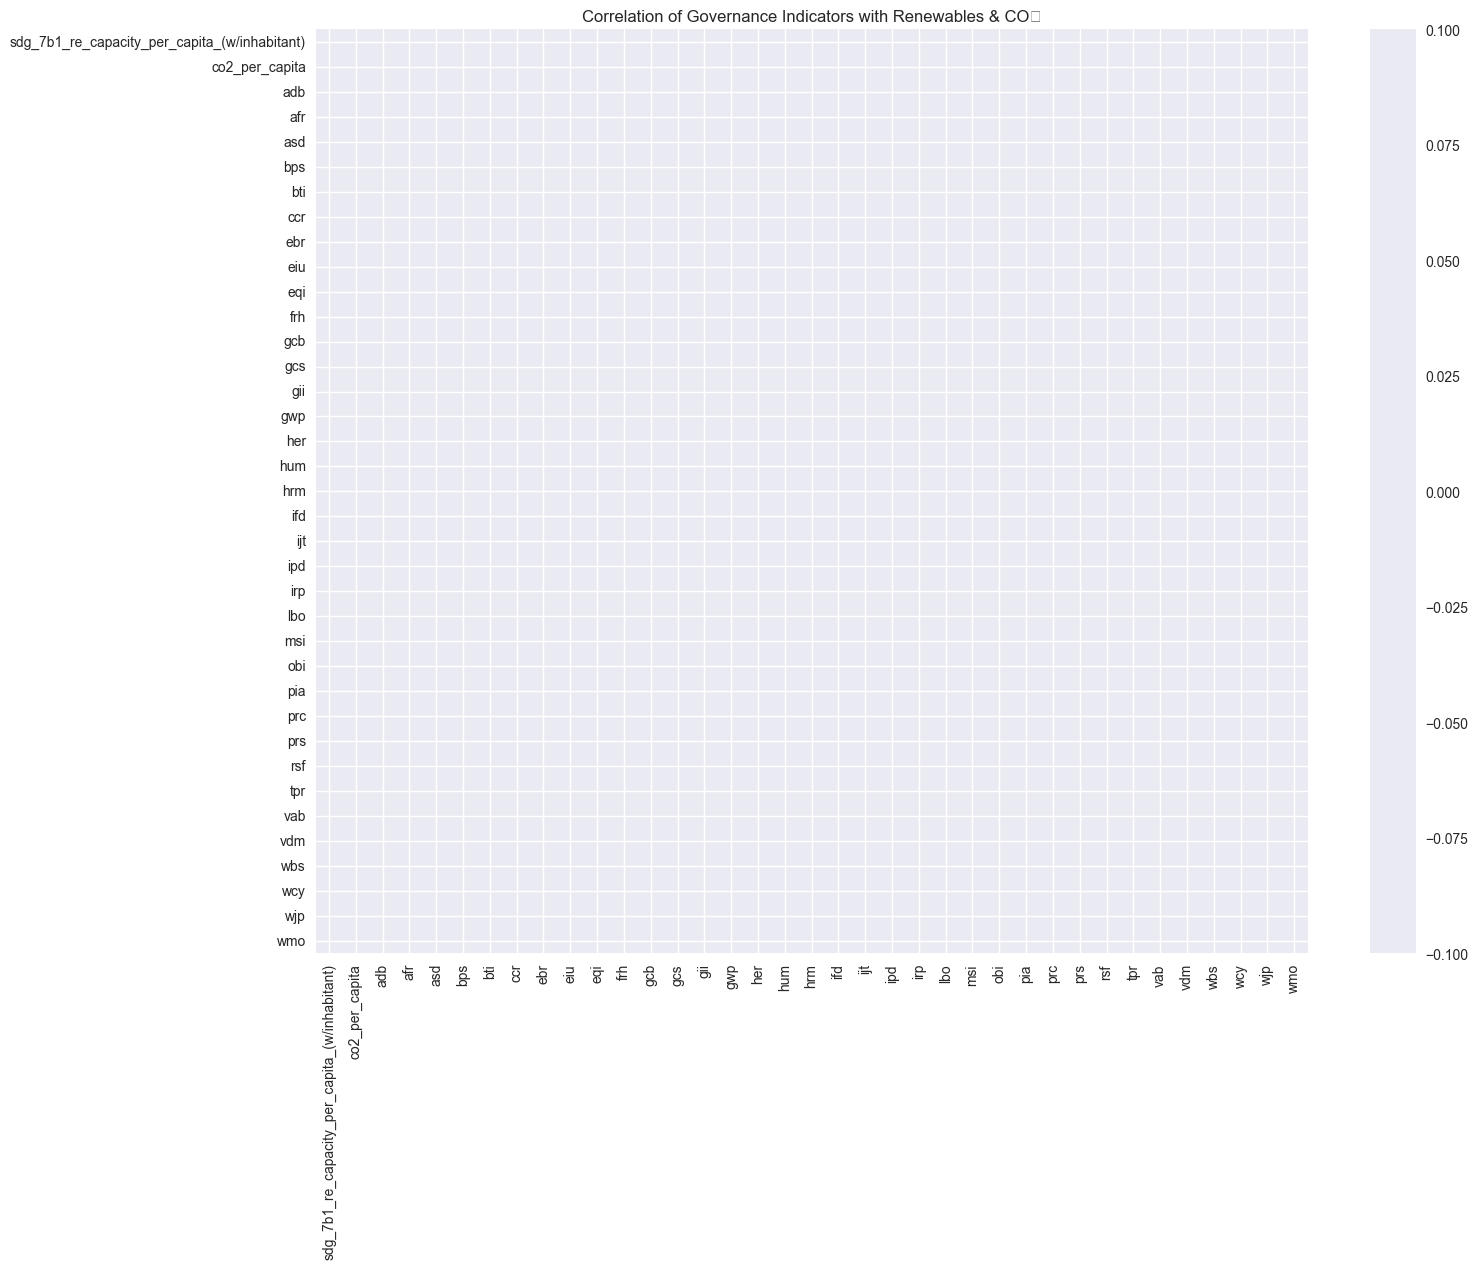

In [44]:
#Governance Correlations
wgi_cols = [
    'adb','afr','asd','bps','bti','ccr','ebr','eiu','eqi','frh','gcb','gcs',
    'gii','gwp','her','hum','hrm','ifd','ijt','ipd','irp','lbo','msi','obi',
    'pia','prc','prs','rsf','tpr','vab','vdm','wbs','wcy','wjp','wmo'
]

# Use only columns present in dataset
wgi_used = [c for c in wgi_cols if c in df.columns]

# Select numeric columns for correlation
corr_cols = ["sdg_7b1_re_capacity_per_capita_(w/inhabitant)", "co2_per_capita"] + wgi_used
corr_df = df[corr_cols].copy()
corr_df = corr_df.apply(pd.to_numeric, errors='coerce')  # ensure numeric
corr_df.dropna(inplace=True)

plt.figure(figsize=(16,12))
sns.heatmap(corr_df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation of Governance Indicators with Renewables & CO₂")
plt.show()

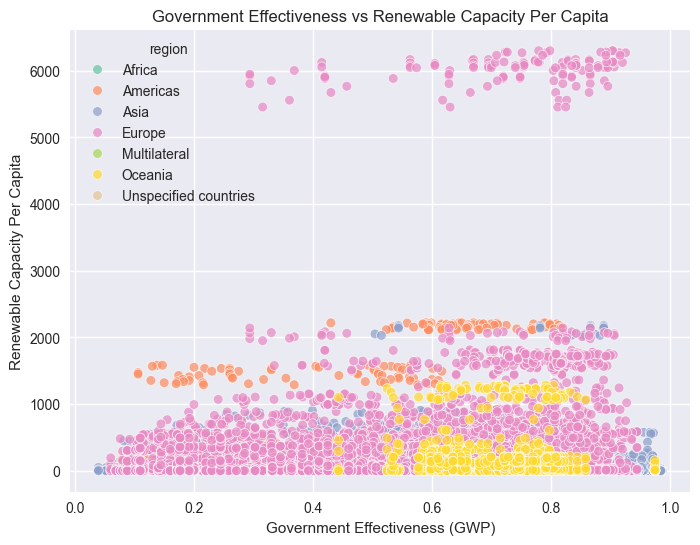

In [45]:
#Governance vs Renewables
if "gwp" in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(
        data=df,
        x="gwp",
        y="sdg_7b1_re_capacity_per_capita_(w/inhabitant)",
        hue="region",
        alpha=0.7
    )
    plt.title("Government Effectiveness vs Renewable Capacity Per Capita")
    plt.xlabel("Government Effectiveness (GWP)")
    plt.ylabel("Renewable Capacity Per Capita")
    plt.show()

c:\Users\Code Lou\Documents\projects\global_energy_analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


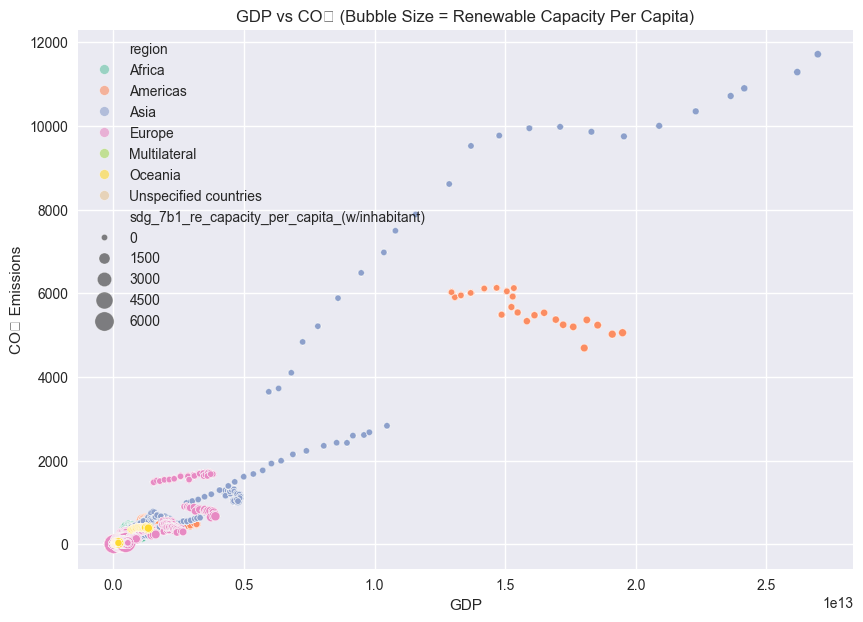

In [46]:
#GDP, CO₂, and Renewables (3-Way)
if all(col in df.columns for col in ["gdp","co2","sdg_7b1_re_capacity_per_capita_(w/inhabitant)"]):
    plt.figure(figsize=(10,7))
    sns.scatterplot(
        data=df,
        x="gdp",
        y="co2",
        size="sdg_7b1_re_capacity_per_capita_(w/inhabitant)",
        hue="region",
        alpha=0.6,
        sizes=(20, 200)
    )
    plt.title("GDP vs CO₂ (Bubble Size = Renewable Capacity Per Capita)")
    plt.xlabel("GDP")
    plt.ylabel("CO₂ Emissions")
    plt.show()

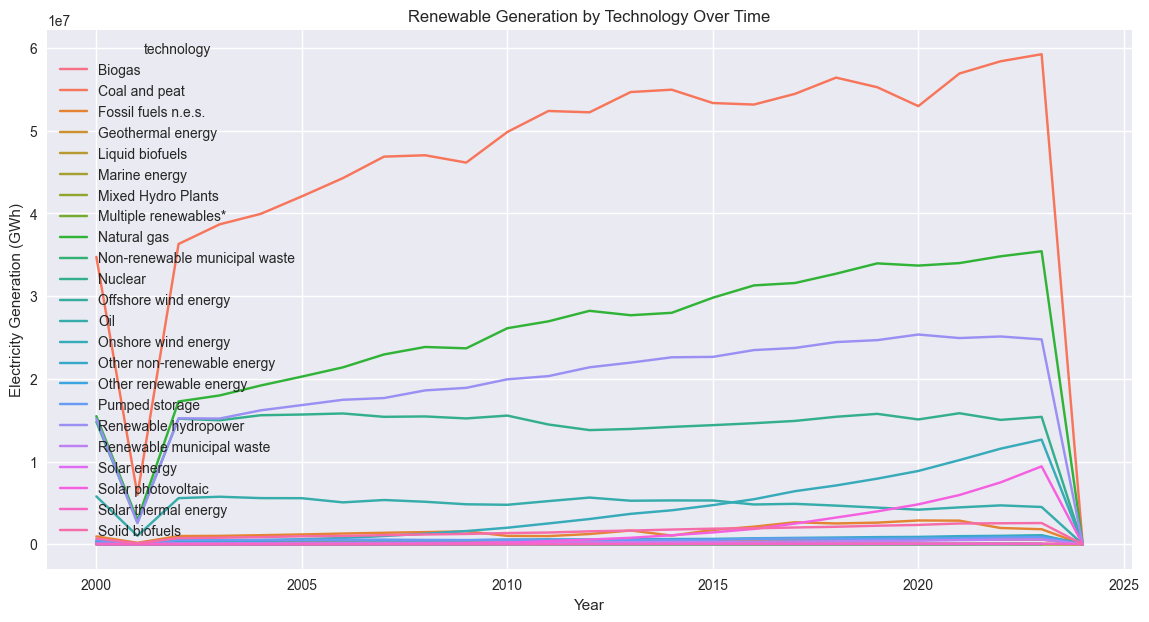

In [47]:
#Technology Trends Over Time
if "technology" in df.columns:
    tech_trends = df.groupby(["technology", "year"])["electricity_generation_(gwh)"].sum().reset_index()

    plt.figure(figsize=(14,7))
    sns.lineplot(data=tech_trends, x="year", y="electricity_generation_(gwh)", hue="technology")
    plt.title("Renewable Generation by Technology Over Time")
    plt.xlabel("Year")
    plt.ylabel("Electricity Generation (GWh)")
    plt.show()

In [48]:
#Save Clean Dataset for EDA / SQL Load
# -----------------------------
# Keep numeric columns as numeric (no formatting), categorical as-is
clean_path = "../data/final/eda_data.csv"
df.to_csv(clean_path, index=False)
print(f"Cleaned dataset saved to {clean_path}")

Cleaned dataset saved to ../data/final/eda_data.csv
